In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds


# Step 1: Load MovieLens 100k data from file or URL
url = 'https://files.grouplens.org/datasets/movielens/ml-100k/u.data'
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(url, sep='\t', names=column_names)

# Create a pivot table (user-item matrix) for ratings
ratings_matrix = df.pivot(index='user_id', columns='item_id', values='rating')
 

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds
 
# Step 3: Identify non-NA entries in the ratings matrix
non_na_mask = ratings_matrix.notna()

# Convert mask to a list of non-NA (user, item) pairs
non_na_indices = np.argwhere(non_na_mask.values)  # Get (row, col) indices of non-NA values

# Randomly select 20% of non-NA entries to introduce missing data
n_remove = int(0.2 * len(non_na_indices))  # 20% of available data
remove_indices = np.random.choice(np.arange(len(non_na_indices)), size=n_remove, replace=False)

# Save the original values that will be removed for later evaluation
original_values = ratings_matrix.copy()

# Step 4: Introduce missing values
ratings_matrix_masked = ratings_matrix.copy()

# Set the selected 20% of data points to NaN
for index in remove_indices:
    row, col = non_na_indices[index]  # Get the (row, col) pair
    ratings_matrix_masked.iloc[row, col] = np.nan  # Set the value at that position to NaN

# Step 5: Fill the missing values with 0 for SVD input (other methods can be used here)
R_filled = ratings_matrix_masked.fillna(0).values

# Step 6: Apply SVD (Singular Value Decomposition)
# Decompose the matrix using SVD
U, sigma, Vt = svds(R_filled, k=50)  # Using 50 latent factors
sigma = np.diag(sigma)  # Convert sigma (1D array) to a diagonal matrix

# Reconstruct the matrix using the decomposed matrices
R_predicted = np.dot(np.dot(U, sigma), Vt)

# Step 7: Evaluate performance of the SVD model
# Create a DataFrame for the predicted ratings
imputed_ratings = pd.DataFrame(R_predicted, columns=ratings_matrix.columns, index=ratings_matrix.index)

# Calculate RMSE on the originally removed 20% of the data
true_values = original_values.iloc[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]
predicted_values = imputed_ratings.iloc[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]



In [3]:
# Extract the values from the original matrix and imputed matrix for comparison
true_values = original_values.values[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]
predicted_values = imputed_ratings.values[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]

# Check if their shapes match
print(f"True values shape: {true_values.shape}")
print(f"Predicted values shape: {predicted_values.shape}")

# Calculate RMSE if shapes match
if true_values.shape == predicted_values.shape:
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    print(f'RMSE for the SVD-based prediction: {rmse}')
else:
    print("Error: Shape mismatch between true values and predicted values.")


True values shape: (20000,)
Predicted values shape: (20000,)
RMSE for the SVD-based prediction: 2.8933161846781603


In [4]:
ratings_matrix_masked 

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,4.0,3.0,3.0,5.0,4.0,1.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import numpy as np
from fancyimpute import IterativeSVD
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [6]:
mycebmf= cEBMF(data= np.array(ratings_matrix_masked), K=12,
               prior_L = "exp",
               prior_F = "exp")

In [7]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])
print(mycebmf.K)

The array contains missing values (NaN), generate initialization using iterive svd.
[IterativeSVD] Iter 1: observed MAE=2.676955
[IterativeSVD] Iter 2: observed MAE=2.140102
[IterativeSVD] Iter 3: observed MAE=1.729702
[IterativeSVD] Iter 4: observed MAE=1.413644
[IterativeSVD] Iter 5: observed MAE=1.216425
[IterativeSVD] Iter 6: observed MAE=1.096174
[IterativeSVD] Iter 7: observed MAE=1.014574
[IterativeSVD] Iter 8: observed MAE=0.955530
[IterativeSVD] Iter 9: observed MAE=0.910823
[IterativeSVD] Iter 10: observed MAE=0.875819
[IterativeSVD] Iter 11: observed MAE=0.847677
[IterativeSVD] Iter 12: observed MAE=0.824461
[IterativeSVD] Iter 13: observed MAE=0.804970
[IterativeSVD] Iter 14: observed MAE=0.788386
[IterativeSVD] Iter 15: observed MAE=0.774105
[IterativeSVD] Iter 16: observed MAE=0.761638
[IterativeSVD] Iter 17: observed MAE=0.750661
[IterativeSVD] Iter 18: observed MAE=0.740897
[IterativeSVD] Iter 19: observed MAE=0.732183
[IterativeSVD] Iter 20: observed MAE=0.724319
[Iter

In [8]:
for i in range(60):
    mycebmf.iter()

[0.1136724  0.06751982 0.06310104 0.0584259  0.05374493 0.04930331
 0.04529258 0.04182579 0.03893907 0.03660983 0.03477937 0.03337236
 0.0323106  0.03152144 0.03094202 0.03052066 0.03021651 0.02999819
 0.02984213 0.02973092 0.02965184 0.0295957  0.02955589 0.02952769]
[0.1136724  0.06751982 0.06310104 0.0584259  0.05374493 0.04930331
 0.04529258 0.04182579 0.03893907 0.03660983 0.03477937 0.03337236
 0.0323106  0.03152144 0.03094202 0.03052066 0.03021651 0.02999819
 0.02984213 0.02973092 0.02965184 0.0295957  0.02955589 0.02952769]
[0.1136724  0.06751982 0.06310104 0.0584259  0.05374493 0.04930331
 0.04529258 0.04182579 0.03893907 0.03660983 0.03477937 0.03337236
 0.0323106  0.03152144 0.03094202 0.03052066 0.03021651 0.02999819
 0.02984213 0.02973092 0.02965184 0.0295957  0.02955589 0.02952769]
[0.1136724  0.06751982 0.06310104 0.0584259  0.05374493 0.04930331
 0.04529258 0.04182579 0.03893907 0.03660983 0.03477937 0.03337236
 0.0323106  0.03152144 0.03094202 0.03052066 0.03021651 0.0

c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\posterior_computation.py:83: RuntimeWarning: overflow encountered in exp
  wpost = w* np.exp( log_prob) / (sum(w *np.exp(log_prob)))
c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\posterior_computation.py:83: RuntimeWarning: invalid value encountered in divide
  wpost = w* np.exp( log_prob) / (sum(w *np.exp(log_prob)))


[0.1136724  0.06751982 0.06310104 0.0584259  0.05374493 0.04930331
 0.04529258 0.04182579 0.03893907 0.03660983 0.03477937 0.03337236
 0.0323106  0.03152144 0.03094202 0.03052066 0.03021651 0.02999819
 0.02984213 0.02973092 0.02965184 0.0295957  0.02955589 0.02952769]
[0.1136724  0.06751982 0.06310104 0.0584259  0.05374493 0.04930331
 0.04529258 0.04182579 0.03893907 0.03660983 0.03477937 0.03337236
 0.0323106  0.03152144 0.03094202 0.03052066 0.03021651 0.02999819
 0.02984213 0.02973092 0.02965184 0.0295957  0.02955589 0.02952769]
[0.1136724  0.06751982 0.06310104 0.0584259  0.05374493 0.04930331
 0.04529258 0.04182579 0.03893907 0.03660983 0.03477937 0.03337236
 0.0323106  0.03152144 0.03094202 0.03052066 0.03021651 0.02999819
 0.02984213 0.02973092 0.02965184 0.0295957  0.02955589 0.02952769]
[0.1136724  0.06751982 0.06310104 0.0584259  0.05374493 0.04930331
 0.04529258 0.04182579 0.03893907 0.03660983 0.03477937 0.03337236
 0.0323106  0.03152144 0.03094202 0.03052066 0.03021651 0.0

c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ash.py:55: RuntimeWarning: divide by zero encountered in log
  log_lik =    np.sum(np.log(np.sum(np.exp(L)*optimal_pi, axis=1)))


ValueError: cannot convert float NaN to integer

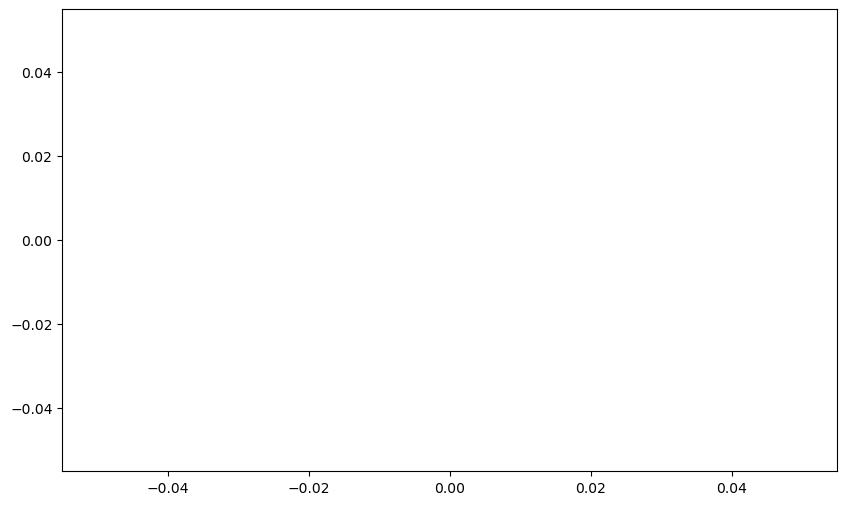

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

In [10]:
# Assuming 'Y' is the numpy array with your imputed data
# Also assuming 'original_values' is the original DataFrame before you removed 20% of the data
Y= mycebmf.Y_fit
# Extract the original values that were removed (same as before)
true_values = original_values.values[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]

# Extract the corresponding imputed values from Y
imputed_values = Y[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]

# Check if their shapes match
print(f"True values shape: {true_values.shape}")
print(f"Imputed values shape: {imputed_values.shape}")

# Calculate RMSE if shapes match
if true_values.shape == imputed_values.shape:
    rmse = np.sqrt(mean_squared_error(true_values, imputed_values))
    print(f'RMSE for your custom imputation method: {rmse}')
else:
    print("Error: Shape mismatch between true values and imputed values.")


True values shape: (20000,)
Imputed values shape: (20000,)
RMSE for your custom imputation method: 1.0617501407948469


In [11]:
k=1
mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
 

ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     = mycebmf.prior_L,
                      verbose=False
                      )
print(ash_obj.post_mean)
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2

c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\cEBMF.py:303: RuntimeWarning: divide by zero encountered in power
  s_l = (denominator_l_hat) ** (-0.5)+ 1e-32
c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\distribution_operation.py:47: RuntimeWarning: invalid value encountered in add
  out_1 = (np.log(rate) + 0.5 * sebetahat**2 * rate**2 - betahat * rate +
c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\posterior_computation.py:77: RuntimeWarning: invalid value encountered in add
  lg = np.log(a) + s**2 * a**2 / 2 - a * x + norm.logcdf(x / s - s * a)
c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\posterior_computation.py:83: RuntimeWarning: overflow encountered in exp
  wpost = w* np.exp( log_prob) / (sum(w *np.exp(log_prob)))


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan n

c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:32: RuntimeWarning: invalid value encountered in divide
  alpha = (a - mean) / sd
c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:33: RuntimeWarning: invalid value encountered in divide
  beta = (b - mean) / sd
c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:72: RuntimeWarning: invalid value encountered in divide
  alpha = (a - mean) / sd
c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:73: RuntimeWarning: invalid value encountered in divide
  beta = (b - mean) / sd


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

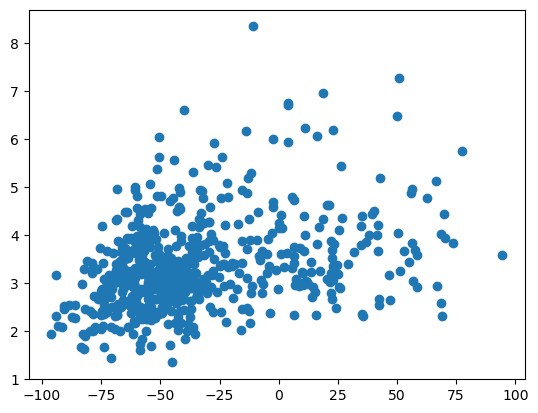

In [12]:
betahat   =lhat
sebetahat =s_l 
prior     = mycebmf.prior_L
verbose=False
mult=np.sqrt(2)

plt.scatter(betahat, sebetahat)

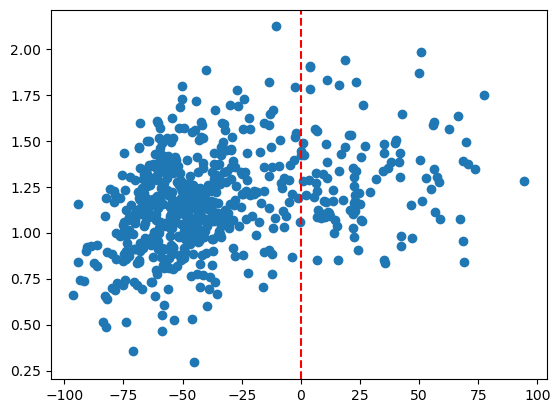

In [13]:
np.sqrt(1e-32)
 
plt.scatter(betahat,np.log(sebetahat))
plt.axvline(x=0, color='red', linestyle='--')  # Add a horizontal line at y=0

In [14]:
scale=autoselect_scales_mix_exp(betahat  = betahat,
                                         sebetahat= sebetahat,
                                          mult=1.5)
print(scale)
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
optimal_pi = optimize_pi( np.exp(L),
                                 penalty=10,
                                 verbose=verbose)  
print((L[5,:]))
sebetahat[5]

[0.00000000e+00 9.76238531e-02 1.46435780e-01 2.19653669e-01
 3.29480504e-01 4.94220756e-01 7.41331134e-01 1.11199670e+00
 1.66799505e+00 2.50199258e+00 3.75298887e+00 5.62948330e+00
 8.44422495e+00 1.26663374e+01 1.89995061e+01 2.84992592e+01
 4.27488888e+01 6.41233332e+01 9.61849999e+01 1.44277500e+02]
[-inf  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan]


inf

In [20]:
mycebmf.Rk[5,:]
np.isnan(mycebmf.Rk[5,:]).sum()
mycebmf.data.shape

(943, 1682)

In [ ]:
log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))
        
out= posterior_mean_exp(betahat, sebetahat,
                                 log_pi=log_pi, 
                                 scale=scale)

In [ ]:
subset_sebetahat = sebetahat[betahat == 0]
subset_sebetahat

In [44]:
Z = mycebmf.Rk
nu = mycebmf.F[:,k] 
omega= mycebmf.F2[:,k]
tau= mycebmf.tau
has_nan=mycebmf.has_nan
 
numerator_l_hat = np.sum(tau * Z * nu, axis=1)
denominator_l_hat = np.sum(tau * omega, axis=1) + 1e-32

In [ ]:
denominator_l_hat